<a href="https://colab.research.google.com/github/DaanMoura/AprendizadoDeMaquina/blob/main/trabalho2/AM_Trab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from skimage.morphology import skeletonize

import secrets
from prettytable import PrettyTable

In [3]:
numbers_df = pd.read_csv("https://media.githubusercontent.com/media/DaanMoura/AprendizadoDeMaquina/main/trabalho2/data/numbers.csv")

In [4]:
numbers_df.head(20)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


In [5]:
numbers_df.drop(['label'], axis=1, inplace=True)

In [6]:
numbers_df['pixel783'] = 0
numbers = numbers_df.to_numpy()
len(numbers)

70000

In [75]:
def to_binary(image):
  out = image.copy()
  for i in range(len(image)):
    if (image[i] > 0):
        out[i] = 1
    else:
        out[i] = 0
  return out
      

In [ ]:
bin_numbers = numbers.copy()
for i in range(len(numbers)):
  if i % 10000 == 0:
    print('passando por ', i)
  bin_numbers[i] = to_binary(numbers[i])

In [76]:
bin_numbers = numbers.copy()
for i in range(len(numbers)):
  if i % 10000 == 0:
    print('passando por ', i)
  bin_numbers[i] = skeletonize(to_binary(numbers[i]).reshape(28,28)).reshape(784)

passando por  0
passando por  10000
passando por  20000
passando por  30000
passando por  40000
passando por  50000
passando por  60000


In [ ]:
bin_numbers = numbers.copy()
for i in range(len(numbers)):
  if i % 10000 == 0:
    print('passando por ', i)
  bin_numbers[i] = skeletonize(to_binary(numbers[i]).reshape(28,28)).reshape(784)

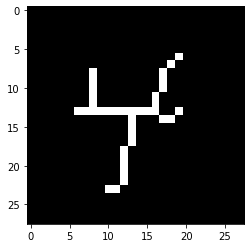

In [77]:
plt.imshow(bin_numbers[2310].reshape(28,28), cmap = 'gray')

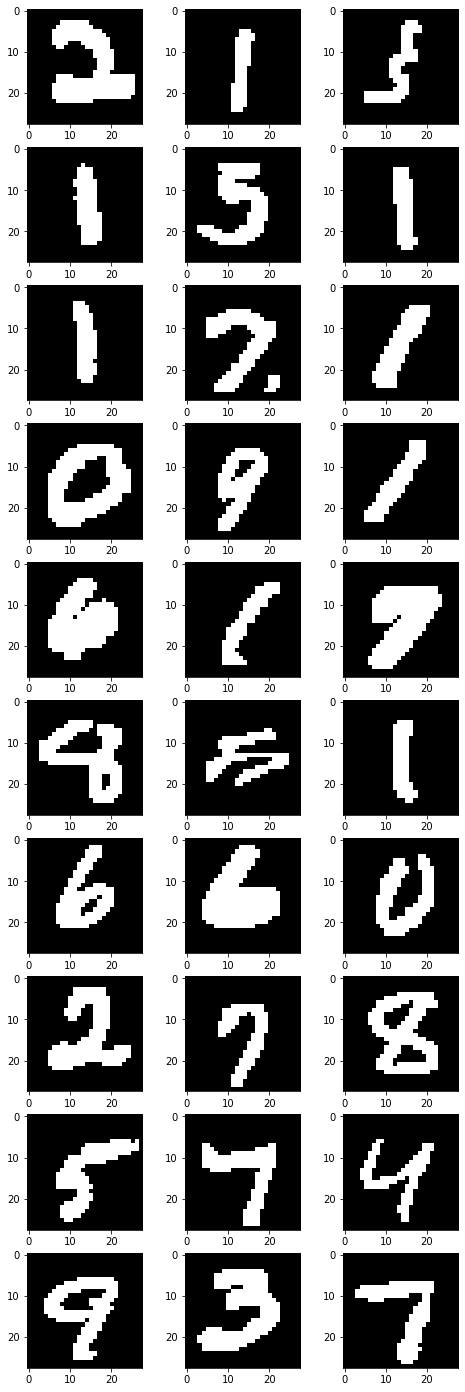

In [10]:
plt.figure(figsize=[25, 25])
for i in range (1, 11):
  for j in range (1, 4):
    plt.subplot(10, 9, (i-1)* 9 + j) 
    plt.imshow(bin_numbers[secrets.choice(list(range(70000)))].reshape(28,28), cmap = 'gray')

In [38]:
reduced_data = PCA(n_components=2).fit_transform(numbers)
print(reduced_data)
kmeans = KMeans(init="k-means++", n_clusters=10, n_init=4, random_state=0)
kmeans.fit(reduced_data)

[[ 7.67609256e+02 -4.03274956e+01]
 [ 1.13604716e+03 -5.91559363e-01]
 [-4.98305983e+02  1.09740025e+01]
 ...
 [ 4.67069822e+02  8.97848905e+02]
 [ 2.91862120e+02 -1.93674769e-01]
 [-3.21550989e+02  4.49519089e+02]]


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=4, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [78]:
reduced_data_bin = PCA(n_components=10).fit_transform(bin_numbers)
print(reduced_data_bin)
kmeans_bin = KMeans(init="k-means++", n_clusters=10, n_init=4, random_state=0)
kmeans_bin.fit(reduced_data_bin)

[[ 0.75666436  0.30240979 -0.67585952 ... -0.69013581  0.24750239
   0.6876202 ]
 [ 0.54711968  0.67071952 -1.39734334 ...  1.21536063 -0.39039928
   0.82530892]
 [-0.0072875   0.00837496  0.67903553 ...  0.36507341 -0.02029375
   0.17460507]
 ...
 [-0.06257295  0.73339833 -0.62210716 ... -0.36063397 -0.33291826
   0.42072528]
 [ 0.03897039  0.14295003 -1.39345627 ...  0.1544831   0.603795
  -0.06302614]
 [-0.88998354  1.32147548  0.1841085  ...  0.14831933 -1.03552386
  -0.23832843]]


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=4, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [12]:
kmeans.n_clusters

10

In [13]:
kmeans.cluster_centers_

array([[-223.46588837, -379.63306409],
       [ 110.21741015,   -4.06398848],
       [-289.57635497,  574.95317272],
       [1348.58843692, -191.11803769],
       [-522.19539676,  108.04523604],
       [ 220.23863691, -700.50930604],
       [ 172.66130235,  813.54242416],
       [-818.89536233, -435.72076543],
       [ 642.29219997,  257.40580832],
       [ 645.44949921, -314.3031397 ]])

In [41]:
x = []
y = []
for i in kmeans.cluster_centers_:
  x.append(i[0])
  y.append(i[1])


In [54]:
k = {}
z = {}
numbers_labeled = {}
for i in range (0, 10):
  k[i] = []
  z[i] = []
  numbers_labeled[i] = []
for i in range(0, 70000):
  numbers_labeled[kmeans.labels_[i]].append(numbers[i])
  k[kmeans.labels_[i]].append(reduced_data[i][0])
  z[kmeans.labels_[i]].append(reduced_data[i][1])


In [79]:
x_bin = []
y_bin = []
for i in kmeans_bin.cluster_centers_:
  x_bin.append(i[0])
  y_bin.append(i[1])
k_bin = {}
z_bin = {}
numbers_labeled_bin = {}
for i in range (0, 10):
  k_bin[i] = []
  z_bin[i] = []
  numbers_labeled_bin[i] = []
for i in range(0, 70000):
  numbers_labeled_bin[kmeans_bin.labels_[i]].append(bin_numbers[i])
  k_bin[kmeans_bin.labels_[i]].append(reduced_data_bin[i][0])
  z_bin[kmeans_bin.labels_[i]].append(reduced_data_bin[i][1])

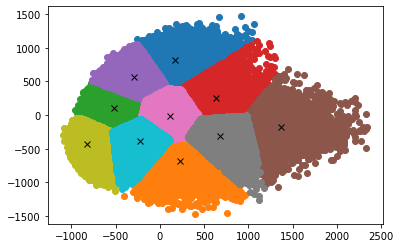

In [56]:

for i in range (0,10):
  plt.plot(k[i],z[i],'o')
plt.plot(x,y,'x', color = 'black') 

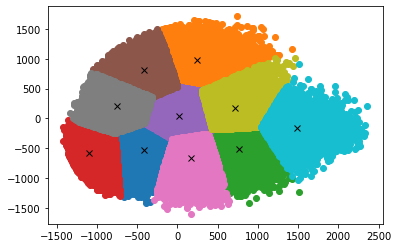

In [58]:

for i in range (0,10):
  plt.plot(k_bin[i],z_bin[i],'o')
plt.plot(x_bin,y_bin,'x', color = 'black') 

In [ ]:
plt.figure(figsize=[25, 25])
for i in range (1, 11):
  for j in range (1, 4):
    plt.subplot(10, 9, (i-1)* 9 + j) 
    plt.imshow(bin_numbers[secrets.choice(list(range(5000)))].reshape(28,28), cmap = 'gray')

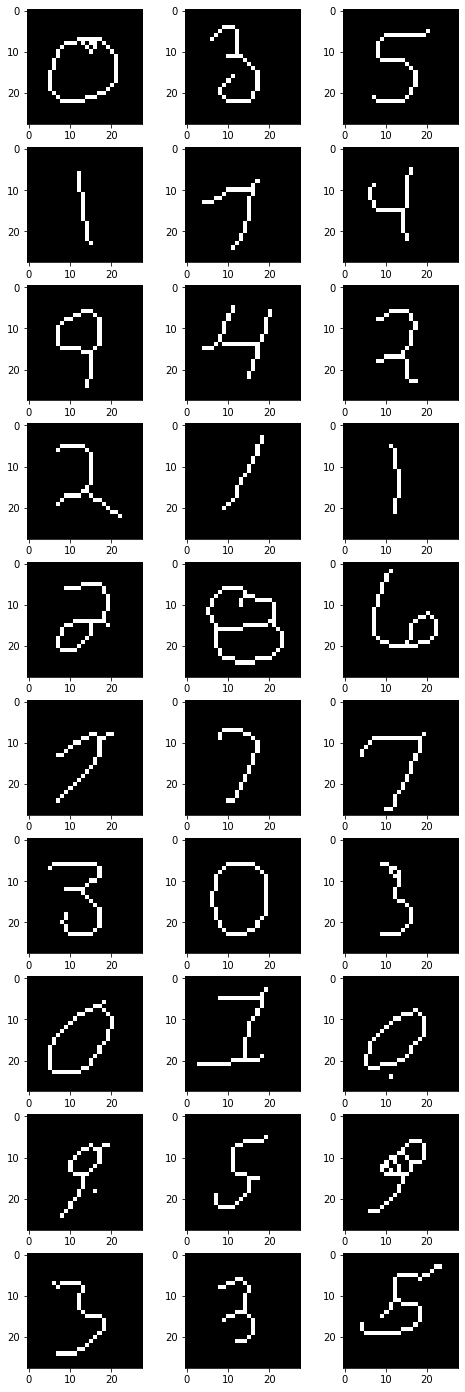

In [80]:
plt.figure(figsize=[25, 25])
for i in range (1, 11):
  for j in range (1, 4):
    plt.subplot(10, 9, (i-1)* 9 + j) 
    plt.imshow(numbers_labeled_bin[i-1][secrets.choice(list(range(500)))].reshape(28,28), cmap = 'gray')

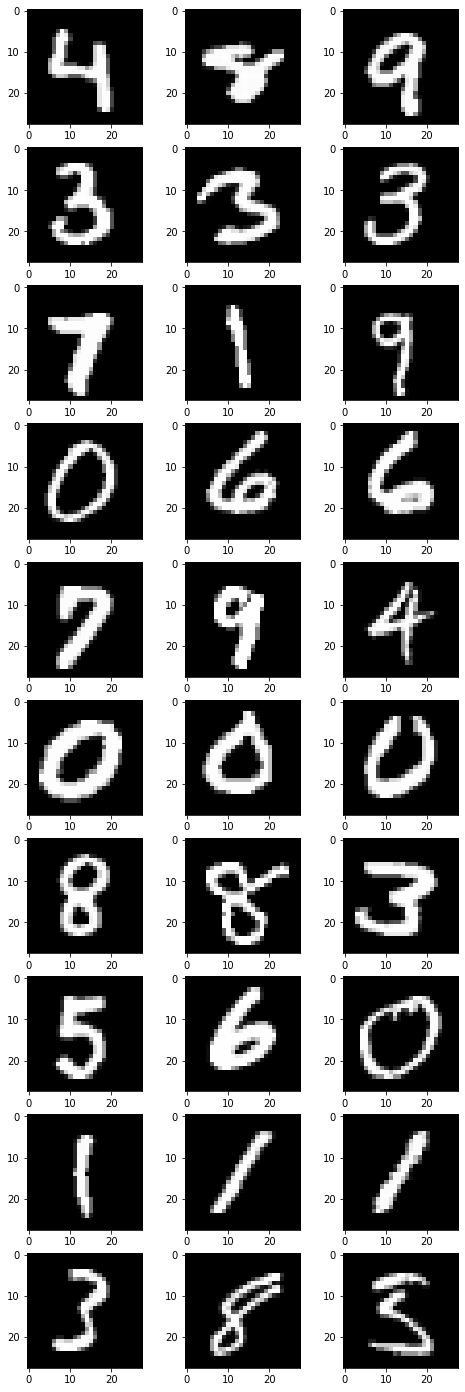

In [60]:
plt.figure(figsize=[25, 25])
for i in range (1, 11):
  for j in range (1, 4):
    plt.subplot(10, 9, (i-1)* 9 + j) 
    plt.imshow(numbers_labeled[i-1][secrets.choice(list(range(500)))].reshape(28,28), cmap = 'gray')